# SYD DAT 7 - Clustering and Trees

##Homework - Due March 27th 2017

* For the following, continue to use the github repository you made for your project
* You don't have to use the same data that you used from the previous homework assignment if
  you have decided to change what your project is about.
* Identify some attributes where you would expect clustering to be successful.
* Try two or more different clustering algorithms, and experiment with
  different numbers of clusters.
* If the clustering works well, try to give descriptive names for the
  different clusters you have found. If the clustering isn't
  successful, try to hypothesise why your data is some homogenous (and
  try clustering on different attributes).
* Try building decision trees on your data. If you think simplicity
  would be good, try to make it as simple as possible. If you think
  accuracy is more important, use ensembling or any other techniques
  that you have learned.
* Evaluate the success of your model (you can use another model from another
  assigment if this doesn't work well).

### since the data I have for my project wasn't much about clustering so to do this assignment I discovered this dataset which I thought was suitable.
### the url - http://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [1]:
import pandas as pd
import numpy as np

In [2]:
msgs = pd.read_csv('SMSSpamCollection.xls',sep='\t',names=['ham_or_spam','message_text'])

In [3]:
keywords = ['free', 'Free', 'FREE','award','Award','AWARD','gift','Gift','Reward','reward','offer','Offer']

In [4]:
msgs['spam_words'] = np.where(msgs.message_text.apply(lambda sentence: any(word in sentence for word in keywords)),1,0)

In [5]:
msgs['length_of_a_msg'] = msgs['message_text'].str.len()

In [6]:
msgs['ham_or_spam_int'] = np.where(msgs['ham_or_spam'] == 'ham',0,1)

In [7]:
msgs

,ham_or_spam,message_text,spam_words,length_of_a_msg,ham_or_spam_int
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,0
1,ham,Ok lar... Joking wif u oni...,0,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,1
3,ham,U dun say so early hor... U c already then say...,0,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148,1
6,ham,Even my brother is not like to speak with me. ...,0,77,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,160,0
8,spam,WINNER!! As a valued network customer you have...,1,158,1
9,spam,Had your mobile 11 months or more? U R entitle...,1,154,1


In [8]:
import sklearn.cluster

In [9]:
clusterer = sklearn.cluster.KMeans(n_clusters=2)

In [10]:
cluster_suggestions = clusterer.fit_predict(msgs[['spam_words','length_of_a_msg']])
cluster_suggestions

array([0, 1, 0, ..., 1, 0, 1])

In [12]:
import sklearn.metrics
sklearn.metrics.silhouette_score(msgs[['spam_words','length_of_a_msg']], cluster_suggestions)

0.69396009821766957

In [34]:
clusterer3 = sklearn.cluster.KMeans(n_clusters=3)
cluster_suggestions3 = clusterer3.fit_predict(msgs[['spam_words','length_of_a_msg']])
cluster_suggestions3
np.unique(cluster_suggestions3)

array([0, 1, 2])

In [13]:
clusterer10 = sklearn.cluster.KMeans(n_clusters=10)
cluster_suggestions10 = clusterer10.fit_predict(msgs[['spam_words','length_of_a_msg']])
sklearn.metrics.silhouette_score(msgs[['spam_words','length_of_a_msg']], cluster_suggestions10)

0.5593344886356717

In [15]:
scores = []
for i in range(2, 21):
    clustereri = sklearn.cluster.KMeans(n_clusters=i)
    cluster_suggestionsi = clustereri.fit_predict(msgs[['spam_words','length_of_a_msg']])
    scores.append(sklearn.metrics.silhouette_score(msgs[['spam_words','length_of_a_msg']], cluster_suggestionsi))
scores

# clustering with 3 clusters has the best score

[0.69396009821766957,
 0.70019036679547286,
 0.63236335633944041,
 0.63761642686275344,
 0.5928830495995423,
 0.59194664395735552,
 0.56956018791296303,
 0.57117452376218258,
 0.5622656511369154,
 0.55889213084829914,
 0.54699070832596952,
 0.54206683710351999,
 0.54256233191641756,
 0.54531846459053979,
 0.55186589077672954,
 0.55202949734290818,
 0.54678460394600947,
 0.54787344798312643,
 0.54358484438483978]

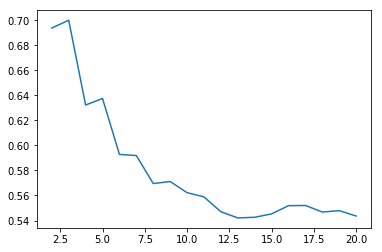

In [16]:
%matplotlib inline
import matplotlib
matplotlib.pyplot.plot(range(2,21), scores)

In [20]:
x = msgs['spam_words']
y = msgs['length_of_a_msg']

In [21]:
colouring = np.array(['blue', 'orange','yellow','green'])

In [35]:
colour_by_cluster = colouring[cluster_suggestions3]
colour_by_cluster

array(['blue', 'orange', 'blue', ..., 'orange', 'blue', 'orange'], 
      dtype='|S6')

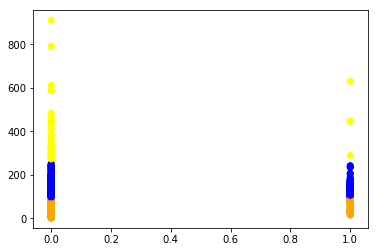

In [36]:
matplotlib.pyplot.scatter(x,y, color=colour_by_cluster)

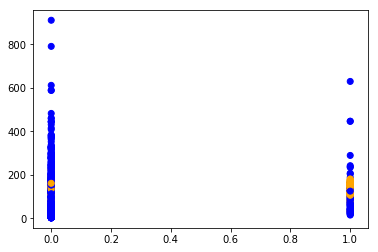

In [32]:
matplotlib.pyplot.scatter(x,y, color=colouring[msgs['ham_or_spam_int']])

In [37]:
# looks like our clustere splitted ham messages into 2 kinds but was pretty close in finding spam messages.

In [38]:
dbscan = sklearn.cluster.DBSCAN(eps=0.1, min_samples=50)

In [39]:
dbscan_suggestions = dbscan.fit_predict(msgs[['spam_words','length_of_a_msg']])
dbscan_suggestions

array([-1,  0, -1, ..., -1, -1,  3], dtype=int64)

In [40]:
dbscan_sug_df = pd.DataFrame(dbscan_suggestions)
dbscan_sug_df[0]

0       -1
1        0
2       -1
3        1
4       -1
5       -1
6       -1
7       -1
8       -1
9       -1
10      -1
11      -1
12      -1
13      -1
14       2
15      -1
16       3
17      -1
18      -1
19      -1
20       4
21       1
22      -1
23      -1
24      -1
25      -1
26       5
27      -1
28      -1
29      -1
        ..
5542    14
5543    25
5544    -1
5545    10
5546    18
5547    -1
5548    12
5549    -1
5550    23
5551    21
5552    -1
5553     8
5554    -1
5555    -1
5556    -1
5557    -1
5558    13
5559    -1
5560    20
5561    -1
5562    -1
5563    -1
5564    -1
5565    -1
5566    -1
5567    -1
5568    28
5569    -1
5570    -1
5571     3
Name: 0, dtype: int64

In [ ]:
# DB scan isn't working really well with this datset

# Decision Trees

In [41]:
import sklearn.tree
import pandas
X = msgs[['spam_words','length_of_a_msg']]
y = msgs.ham_or_spam

In [42]:
dtc = sklearn.tree.DecisionTreeClassifier(max_depth=1)

In [43]:
dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [44]:
try:
 from StringIO import StringIO
except ImportError:
 from io import StringIO
import sklearn.tree
import IPython.display
import pydot
File_obj = StringIO()
sklearn.tree.export_graphviz(dtc, out_file=File_obj, feature_names=['spam_words', 'length_of_a_msg'])

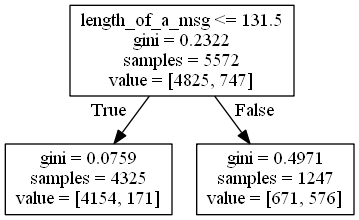

In [46]:
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph.create_png())

In [48]:
dtc.predict([[1,121]])

# this one didn't work well so increasing the depth

array(['ham'], dtype=object)

In [49]:
dtc = sklearn.tree.DecisionTreeClassifier(max_depth=2)
dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

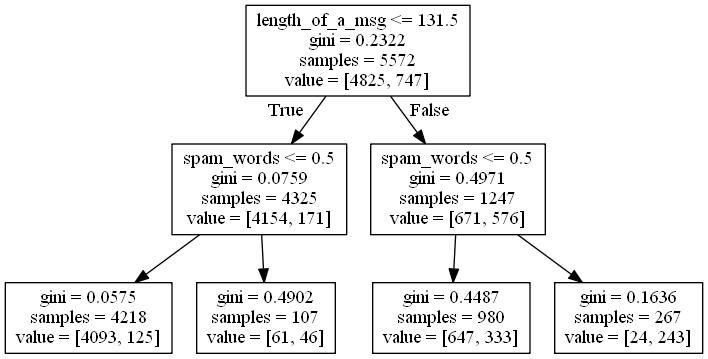

In [50]:
File_obj = StringIO()
sklearn.tree.export_graphviz(dtc, out_file=File_obj, feature_names=['spam_words', 'length_of_a_msg'])
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph.create_png())

In [52]:
dtc.predict([[1,250]])

# this one was okay

array(['spam'], dtype=object)

In [53]:
dtc = sklearn.tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [54]:
dtc.feature_importances_

array([ 0.22949504,  0.77050496])

In [55]:
dtc.predict([[1,121]])

# now it worked well

array(['spam'], dtype=object)

In [60]:
import sklearn.grid_search
brute_force = sklearn.grid_search.GridSearchCV(
    sklearn.tree.DecisionTreeClassifier(),
    param_grid = {
        'max_depth': [1,2,3,4,5,6,7,8,9,10],
        'criterion': ['gini', 'entropy']
    },
    cv=3
)
brute_force.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [61]:
brute_force.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [62]:
brute_force.best_score_

#this is the best score!!

0.9113424264178033